# О датасете
Датасет о погоде в Сиэтле 1948-2017

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('data/seattle_weather.csv', sep=',')

In [3]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
data.shape

(25551, 5)

In [5]:
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [6]:
data.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [7]:
# сколько пустых ячеек
for col in data.columns:
    # синтаксис пандаса, надо разобраться
    null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, null_count))

DATE - 0
PRCP - 3
TMAX - 0
TMIN - 0
RAIN - 3


In [8]:
data = data.dropna(axis=0)

In [9]:
# сколько пустых ячеек
for col in data.columns:
    # синтаксис пандаса, надо разобраться
    null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, null_count))

DATE - 0
PRCP - 0
TMAX - 0
TMIN - 0
RAIN - 0


In [10]:
# о данных
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [11]:
# уникальные значения
data['RAIN'].unique()

array([True, False], dtype=object)

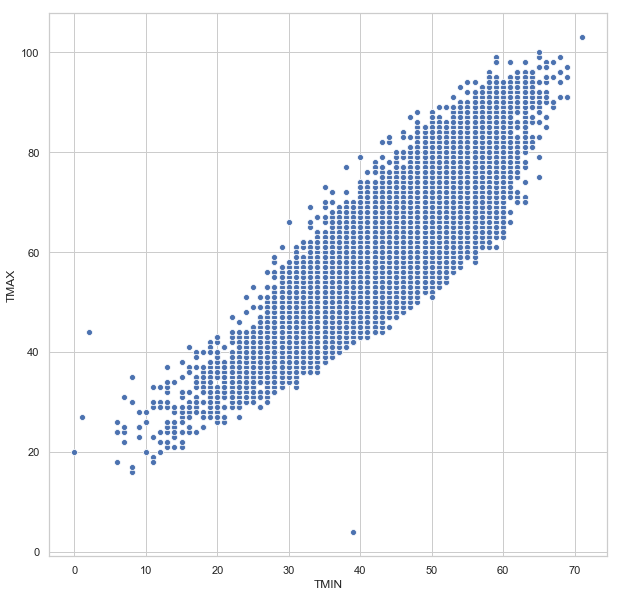

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='TMIN', y='TMAX', data=data)

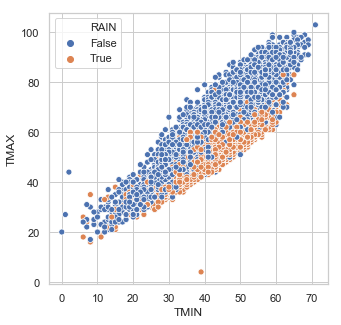

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='TMIN', y='TMAX', data=data, hue='RAIN')

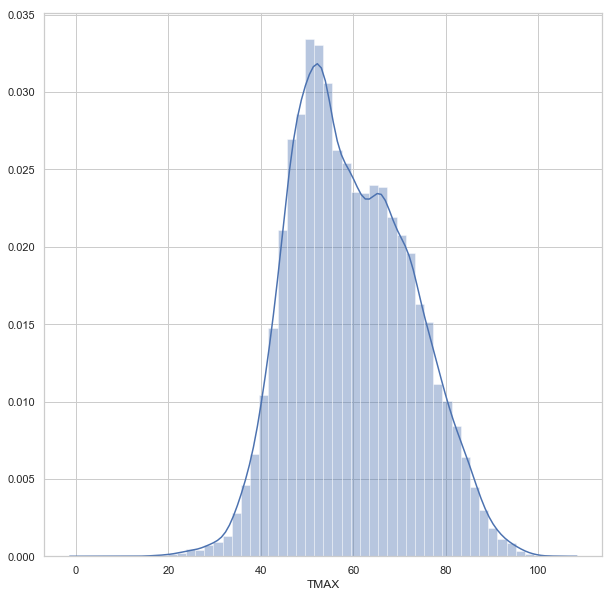

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['TMAX'])

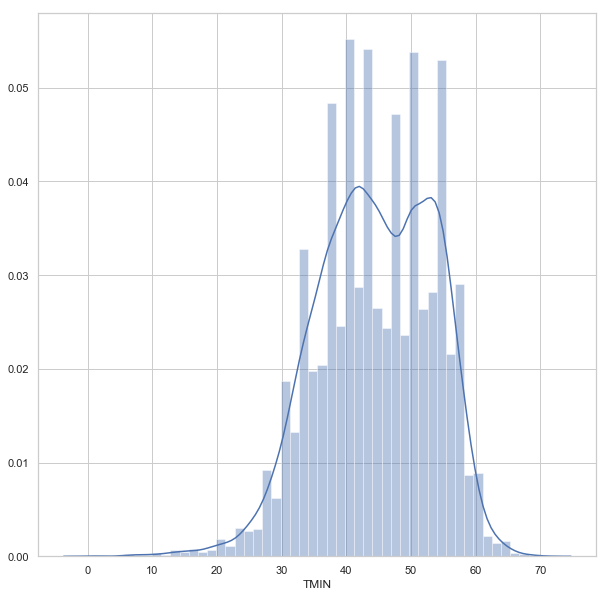

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['TMIN'])

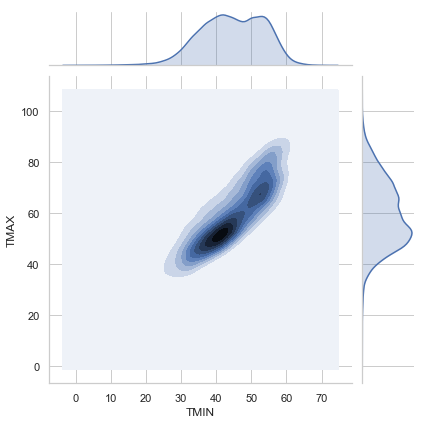

In [19]:
sns.jointplot(x='TMIN', y='TMAX', data=data, kind='kde')

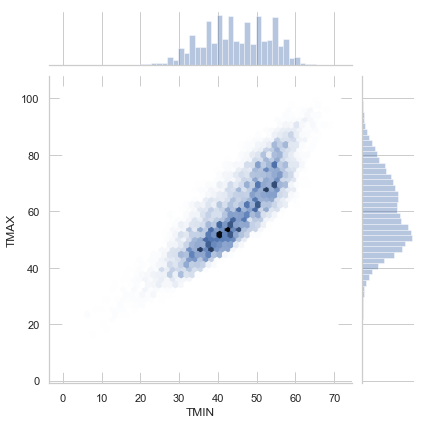

In [20]:
sns.jointplot(x='TMIN', y='TMAX', data=data, kind='hex')

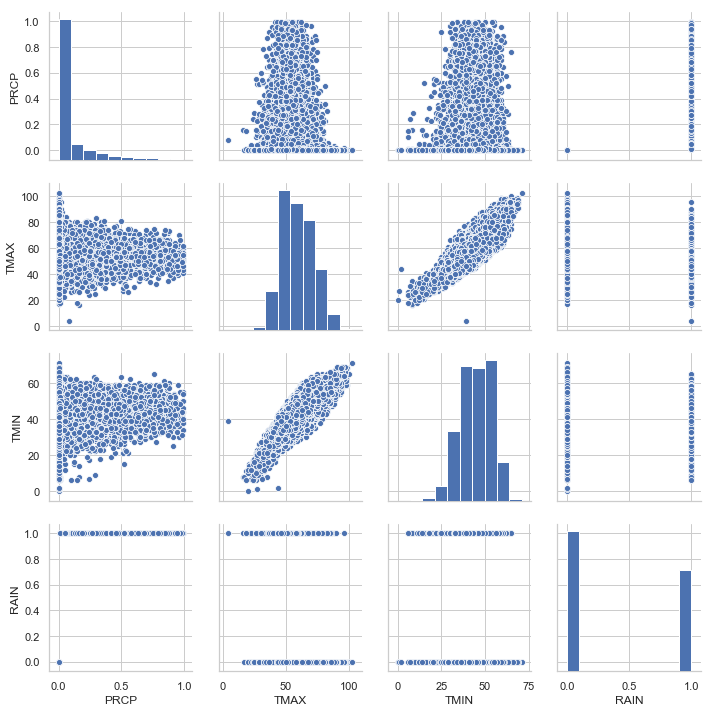

In [30]:
sns.pairplot(data)

C:\Users\Karina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Karina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


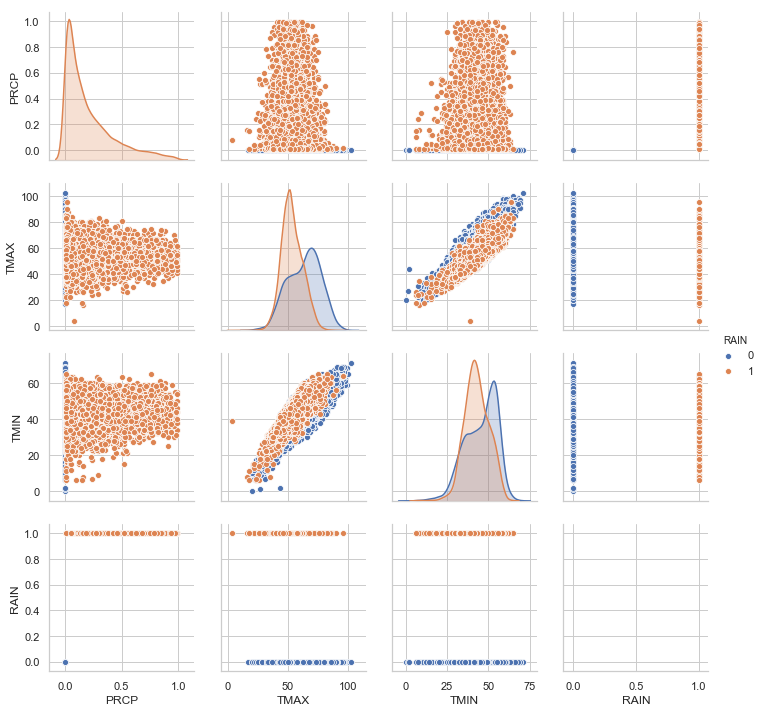

In [31]:
sns.pairplot(data, hue='RAIN')

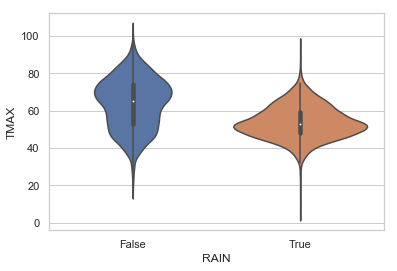

In [21]:
sns.violinplot(x='RAIN', y='TMAX', data=data)

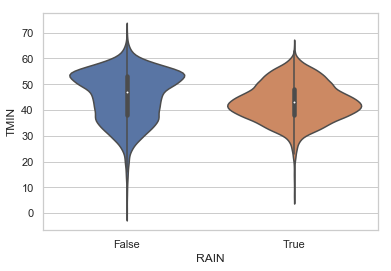

In [22]:
sns.violinplot(x='RAIN', y='TMIN', data=data)

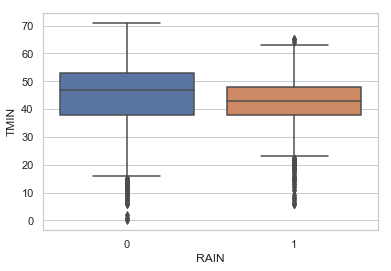

In [32]:
sns.boxplot(x='RAIN', y='TMIN', data=data)

In [33]:
data.corr()

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.265233,-0.085443,0.597746
TMAX,-0.265233,1.000000,0.862447,-0.386005
TMIN,-0.085443,0.862447,1.000000,-0.140519
RAIN,0.597746,-0.386005,-0.140519,1.000000


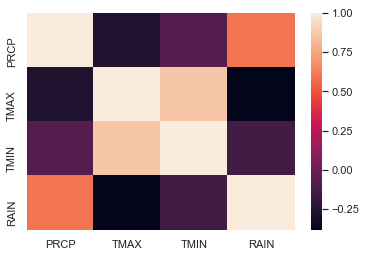

In [34]:
sns.heatmap(data.corr())

In [35]:
data['RAIN'] = [int(val) for val in data['RAIN']]

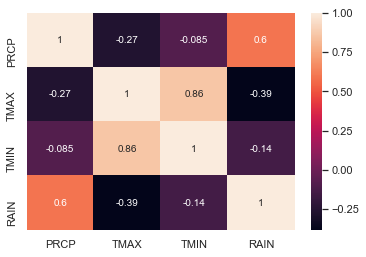

In [36]:
sns.heatmap(data.corr(), annot=True)

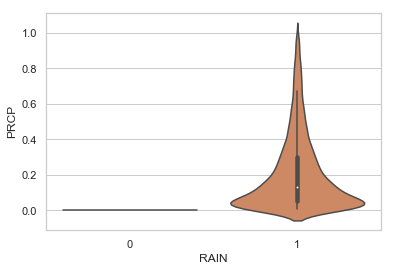

In [37]:
sns.violinplot(x='RAIN', y='PRCP', data=data)

In [38]:
data = data[data['PRCP'] < 1]

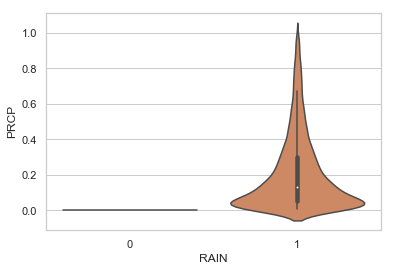

In [39]:
sns.violinplot(x='RAIN', y='PRCP', data=data)